In [1]:
import numpy as npfrom sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_visual_analysis import VisualAnalysis

In [2]:
df=pd.read_excel('Autism.xlsx',na_values="?")

In [3]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Sex,Eth,Jaundice,Autism,Nation,Used_App,Result,Class
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,Jordan,no,5,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,'Middle Eastern ',no,no,Jordan,no,5,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,NaN,no,no,Jordan,yes,5,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,NaN,yes,no,Jordan,no,4,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,'United States',no,10,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,f,White-European,yes,yes,'United Kingdom',no,10,YES
288,1,0,0,0,1,0,1,0,0,1,7.0,f,White-European,yes,yes,Australia,no,4,NO
289,1,0,1,1,1,1,1,0,0,1,4.0,m,Latino,no,no,Brazil,no,7,YES
290,1,1,1,0,1,1,1,1,1,1,4.0,m,'South Asian',no,no,India,no,9,YES


In [42]:
df['Nation'].value_counts()

'United Kingdom'           49
'United States'            42
India                      42
Australia                  23
Jordan                     20
'New Zealand'              13
Egypt                       9
'United Arab Emirates'      7
Canada                      7
Bangladesh                  6
'Saudi Arabia'              4
Pakistan                    4
Philippines                 4
Armenia                     3
Qatar                       3
Syria                       3
Libya                       3
Russia                      3
Iraq                        3
Georgia                     2
Bahrain                     2
Turkey                      2
Lebanon                     2
Malaysia                    2
Afghanistan                 2
Mexico                      2
'South Africa'              2
Austria                     2
Brazil                      2
Italy                       2
'Costa Rica'                1
Romania                     1
Bhutan                      1
Germany   

In [47]:
df['Eth'].value_counts()

White-European       108
Asian                 46
'Middle Eastern '     27
'South Asian'         21
Black                 14
Others                14
Latino                 8
Hispanic               7
Turkish                2
Pasifika               2
Name: Eth, dtype: int64

In [35]:
df.isnull().sum()

A1_Score      0
A2_Score      0
A3_Score      0
A4_Score      0
A5_Score      0
A6_Score      0
A7_Score      0
A8_Score      0
A9_Score      0
A10_Score     0
Age           4
Sex           0
Eth          43
Jaundice      0
Autism        0
Nation        0
Used_App      0
Result        0
Class         0
dtype: int64

# Since we have missing values in Ethenicity, we check how is it distributed.

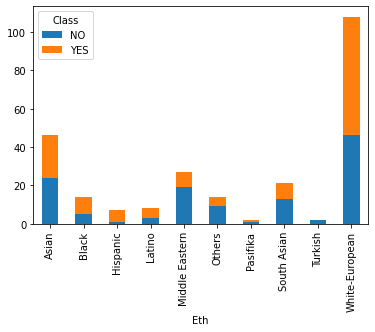

In [34]:
data=pd.DataFrame([('Middle Eastern','NO',19),('Middle Eastern','YES',8),('South Asian','NO',13),('South Asian','YES',8),('Asian','NO',24),('Asian','YES',22),('Black','NO',5),('Black','YES',9),('Hispanic','NO',1),('Hispanic','YES',6),('Latino','NO',3),('Latino','YES',5),('Others','NO',9),('Others','YES',5),('Pasifika','NO',1),('Pasifika','YES',1),('Turkish','NO',2),('Turkish','YES',0),('White-European','NO',46),('White-European','YES',62)],columns=['Eth', 'Class', 'value'])
data=data.set_index(['Eth','Class']).value
data.unstack().plot(kind='bar', stacked=True)

# We do not need result variable as we already have the class
# We drop the same

In [39]:
df.drop(['Result'],axis=1,inplace=True)

# Since, we want to predict the dependency of location on the disease, we encode the country using OHE. Further, the missing values in Ethenicity will be imputed using KNN. Further, Sex will be encoded as male as 1 and female as 0 because of incidence ratio of 4:1. Also, ethnicity will be encoded based on incidence rates.

In [51]:
df['Sex']=np.where(df['Sex']=='f',0,1)
df['Jaundice']=np.where(df['Jaundice']=='no',0,1)
df['Autism']=np.where(df['Autism']=='no',0,1)
df['Used_App']=np.where(df['Used_App']=='no',0,1)
df['Class']=np.where(df['Class']=='NO',0,1)

In [52]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Sex,Eth,Jaundice,Autism,Nation,Used_App,Class
0,1,1,0,0,1,1,0,1,0,0,6.0,1,Others,1,1,Jordan,0,0
1,1,1,0,0,1,1,0,1,0,0,6.0,1,'Middle Eastern ',1,1,Jordan,0,0
2,1,1,0,0,0,1,1,1,0,0,6.0,1,NaN,1,1,Jordan,1,0
3,0,1,0,0,1,1,0,0,0,1,5.0,1,NaN,1,1,Jordan,0,0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,Others,1,1,'United States',0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,1,White-European,1,1,'United Kingdom',0,1
288,1,0,0,0,1,0,1,0,0,1,7.0,1,White-European,1,1,Australia,0,0
289,1,0,1,1,1,1,1,0,0,1,4.0,1,Latino,1,1,Brazil,0,1
290,1,1,1,0,1,1,1,1,1,1,4.0,1,'South Asian',1,1,India,0,1


In [167]:
x = df.drop(['Class'], 1)
y = df['Class']

In [168]:
x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Sex,Eth,Jaundice,Autism,Nation,Used_App
0,1,1,0,0,1,1,0,1,0,0,6.0,1,Others,1,1,Jordan,0
1,1,1,0,0,1,1,0,1,0,0,6.0,1,'Middle Eastern ',1,1,Jordan,0
2,1,1,0,0,0,1,1,1,0,0,6.0,1,NaN,1,1,Jordan,1
3,0,1,0,0,1,1,0,0,0,1,5.0,1,NaN,1,1,Jordan,0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,Others,1,1,'United States',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,1,White-European,1,1,'United Kingdom',0
288,1,0,0,0,1,0,1,0,0,1,7.0,1,White-European,1,1,Australia,0
289,1,0,1,1,1,1,1,0,0,1,4.0,1,Latino,1,1,Brazil,0
290,1,1,1,0,1,1,1,1,1,1,4.0,1,'South Asian',1,1,India,0


In [169]:
enc_nom_1 = (x.groupby('Nation').size()) / len(x)

In [170]:
x['Nation'] = x['Nation'].apply(lambda x : enc_nom_1[x])

In [171]:
x['Age'].fillna(value=x['Age'].mean(),inplace=True)

In [177]:
xtest=x[x['Eth'].isnull()]
xtest.drop(['Eth'],axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [179]:
xtrain=x[~x['Eth'].isnull()]
xtrain.drop(['Eth'],axis=1,inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [189]:
ytrain=x.loc[xtrain.index]['Eth']
ytest=x.loc[xtest.index]['Eth']

In [201]:
xtrain.groupby('Nation').size()

Nation
0.003425    19
0.006849    18
0.010274     7
0.013699     6
0.020548     6
0.023973    12
0.030822     2
0.044521    13
0.068493    10
0.078767    23
0.143836    84
0.167808    49
dtype: int64

In [277]:
enc_nom_2 = x.groupby('Eth').size()

In [205]:
ytrain = ytrain.apply(lambda x : enc_nom_2[x])
ytrain

0       14
1       27
4       14
6      108
7       27
      ... 
287    108
288    108
289      8
290     21
291     21
Name: Eth, Length: 249, dtype: int64

In [206]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5)

In [207]:
classifier.fit(xtrain, ytrain)
ypred = classifier.predict(xtest)

In [210]:
ypred

array([108,  46,  46, 108,  46,   8, 108, 108,  46,  14,  27,   8, 108,
        14,  27,  21,   8,   2,  14, 108,  46,  46,  46,  14,  14, 108,
       108,  46,  21,  14,  21,  27,  27,  27, 108,   8,   8,  27,  27,
        27, 108, 108,  46], dtype=int64)

In [214]:
ytest.index

Int64Index([  2,   3,   5,   9,  11,  19,  21,  24,  28,  32,  36,  40,  43,
             47,  50,  52,  54,  56,  68, 110, 123, 126, 138, 146, 149, 160,
            168, 174, 180, 181, 190, 194, 212, 231, 232, 233, 235, 242, 243,
            244, 249, 251, 268],
           dtype='int64')

In [218]:
o=[]
for i,j in zip(ytest.index,ypred):
    o.append([i,j])

In [227]:
opd=pd.DataFrame(o)

In [229]:
opd.set_index(0,drop=True)

,1
0,
2,108
3,46
5,46
9,108
11,46
19,8
21,108
24,108
28,46


In [250]:
yy=x[x['Eth'].isnull()]

In [255]:
x['Eth_imp']=x['Eth']
x.loc[x['Eth'].isnull(),'Eth_imp']=opd[1]

In [257]:
df1=x.copy()

In [258]:
df1.drop(['Eth'],axis=1,inplace=True)

In [259]:
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Sex,Jaundice,Autism,Nation,Used_App,Eth_imp
0,1,1,0,0,1,1,0,1,0,0,6.0,1,1,1,0.068493,0,Others
1,1,1,0,0,1,1,0,1,0,0,6.0,1,1,1,0.068493,0,'Middle Eastern '
2,1,1,0,0,0,1,1,1,0,0,6.0,1,1,1,0.068493,1,46.0
3,0,1,0,0,1,1,0,0,0,1,5.0,1,1,1,0.068493,0,108.0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,1,1,0.143836,0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,1,1,1,0.167808,0,White-European
288,1,0,0,0,1,0,1,0,0,1,7.0,1,1,1,0.078767,0,White-European
289,1,0,1,1,1,1,1,0,0,1,4.0,1,1,1,0.006849,0,Latino
290,1,1,1,0,1,1,1,1,1,1,4.0,1,1,1,0.143836,0,'South Asian'


In [262]:
k=[]
for i,j in zip(ytrain.index,ytrain.values):
    k.append([i,j])

In [264]:
opd1=pd.DataFrame(k)
opd1.set_index(0,drop=True)

,1
0,
0,14
1,27
4,14
6,108
7,27
...,...
287,108
288,108
289,8


In [297]:
# x['Eth_imputed'] = x['Eth_imp'].apply(lambda x : enc_nom_2[x])
a=dict(enc_nom_2)
a

{8.0: 3,
 14.0: 2,
 21.0: 1,
 27.0: 1,
 46.0: 2,
 108.0: 3,
 "'Middle Eastern '": 27,
 "'South Asian'": 21,
 'Asian': 46,
 'Black': 14,
 'Hispanic': 7,
 'Latino': 8,
 'Others': 14,
 'Pasifika': 2,
 'Turkish': 2,
 'White-European': 108}

In [300]:
x['Eth_imputed']=np.where(x['Eth_imputed']==8,8,np.where(x['Eth_imputed']==14,14,np.where(x['Eth_imputed']==21,21,np.where(x['Eth_imputed']==27,27,np.where(x['Eth_imputed']==46,46,np.where(x['Eth_imputed']==108,108,np.where(x['Eth_imputed']=='Middle Eastern ',27,np.where(x['Eth_imputed']=='South Asian',21,np.where(x['Eth_imputed']=='Asian',46,np.where(x['Eth_imputed']=='Black',14,np.where(x['Eth_imputed']=='Hispanic',7,np.where(x['Eth_imputed']=='Latino',8,np.where(x['Eth_imputed']=='Others',14,np.where(x['Eth_imputed']=='Pasifika',2,np.where(x['Eth_imputed']=='Turkish',2,108)))))))))))))))

In [302]:
x.drop(['Eth_imp'],axis=1,inplace=True)

In [304]:
x.drop(['Eth'],axis=1,inplace=True)

In [305]:
x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Sex,Jaundice,Autism,Nation,Used_App,Eth_imputed
0,1,1,0,0,1,1,0,1,0,0,6.0,1,1,1,0.068493,0,14
1,1,1,0,0,1,1,0,1,0,0,6.0,1,1,1,0.068493,0,108
2,1,1,0,0,0,1,1,1,0,0,6.0,1,1,1,0.068493,1,46
3,0,1,0,0,1,1,0,0,0,1,5.0,1,1,1,0.068493,0,108
4,1,1,1,1,1,1,1,1,1,1,5.0,1,1,1,0.143836,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,1,1,1,0.167808,0,108
288,1,0,0,0,1,0,1,0,0,1,7.0,1,1,1,0.078767,0,108
289,1,0,1,1,1,1,1,0,0,1,4.0,1,1,1,0.006849,0,8
290,1,1,1,0,1,1,1,1,1,1,4.0,1,1,1,0.143836,0,108


In [309]:
df1=pd.concat([x,y],axis=1)

In [310]:
df1

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Sex,Jaundice,Autism,Nation,Used_App,Eth_imputed,Class
0,1,1,0,0,1,1,0,1,0,0,6.0,1,1,1,0.068493,0,14,0
1,1,1,0,0,1,1,0,1,0,0,6.0,1,1,1,0.068493,0,108,0
2,1,1,0,0,0,1,1,1,0,0,6.0,1,1,1,0.068493,1,46,0
3,0,1,0,0,1,1,0,0,0,1,5.0,1,1,1,0.068493,0,108,0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,1,1,0.143836,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,1,1,1,0.167808,0,108,1
288,1,0,0,0,1,0,1,0,0,1,7.0,1,1,1,0.078767,0,108,0
289,1,0,1,1,1,1,1,0,0,1,4.0,1,1,1,0.006849,0,8,1
290,1,1,1,0,1,1,1,1,1,1,4.0,1,1,1,0.143836,0,108,1


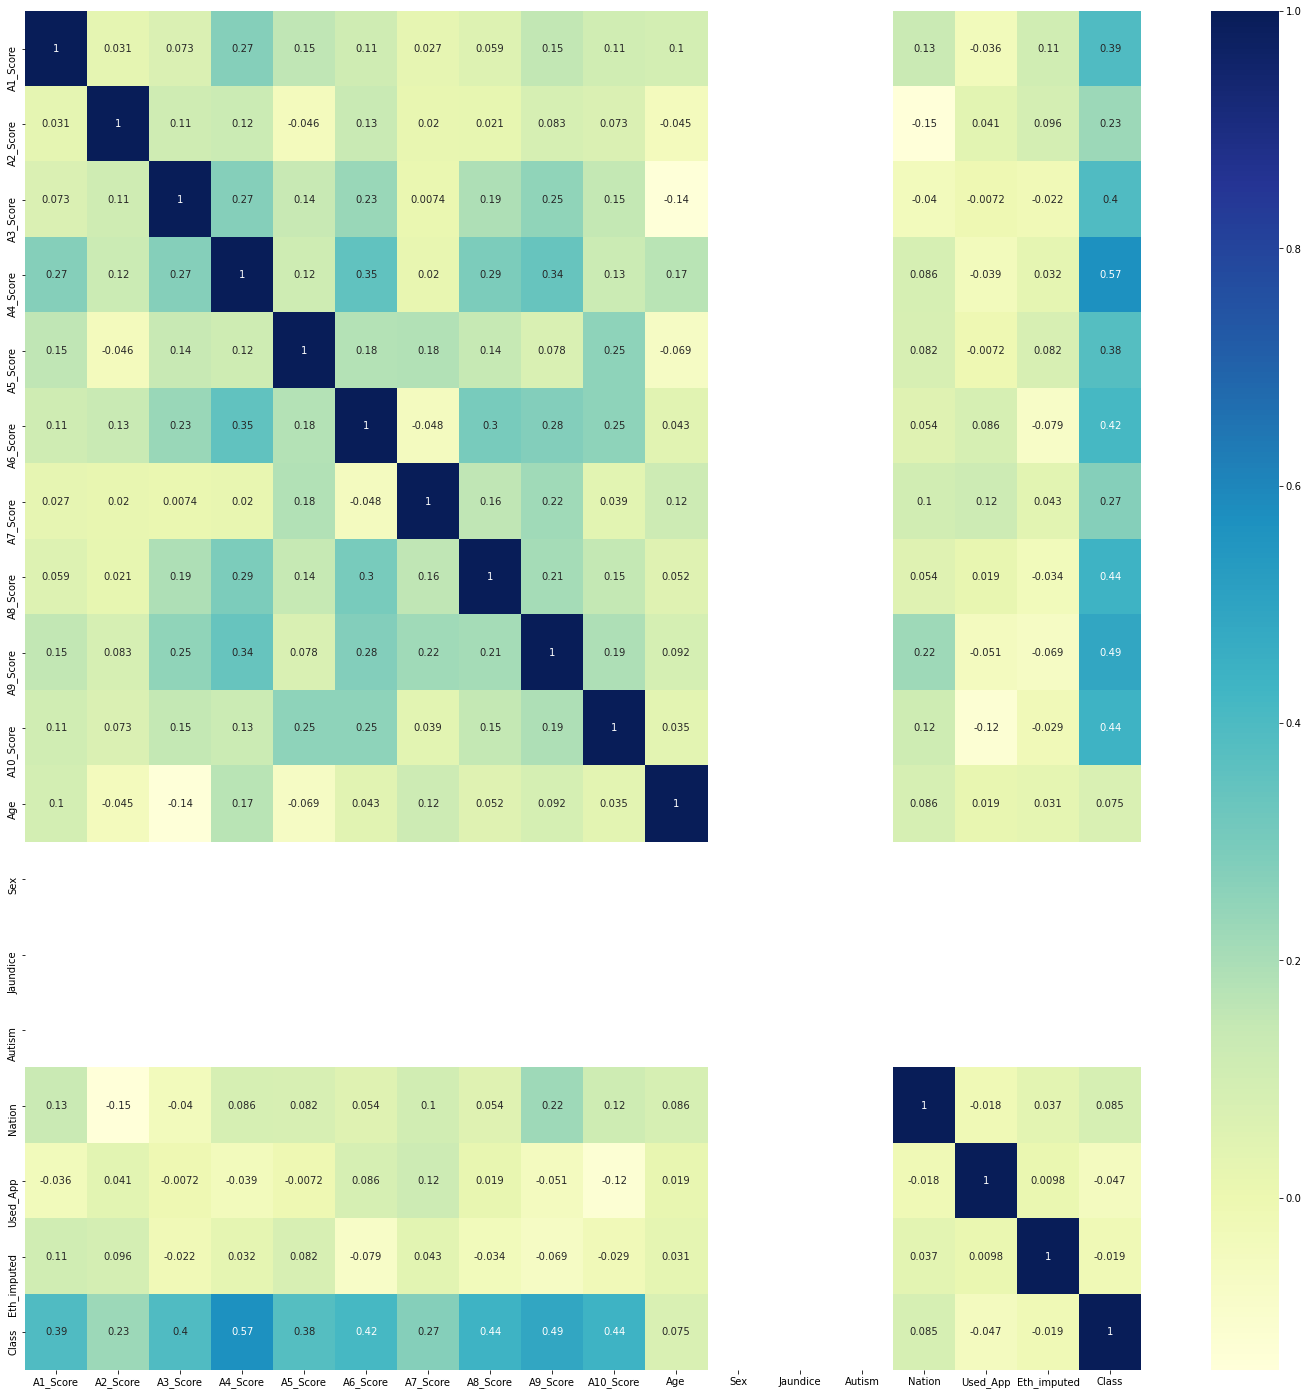

In [311]:
fig, scatter = plt.subplots(figsize = (25,25))
scatter=sns.heatmap(df1.corr(),cmap='YlGnBu',annot=True)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


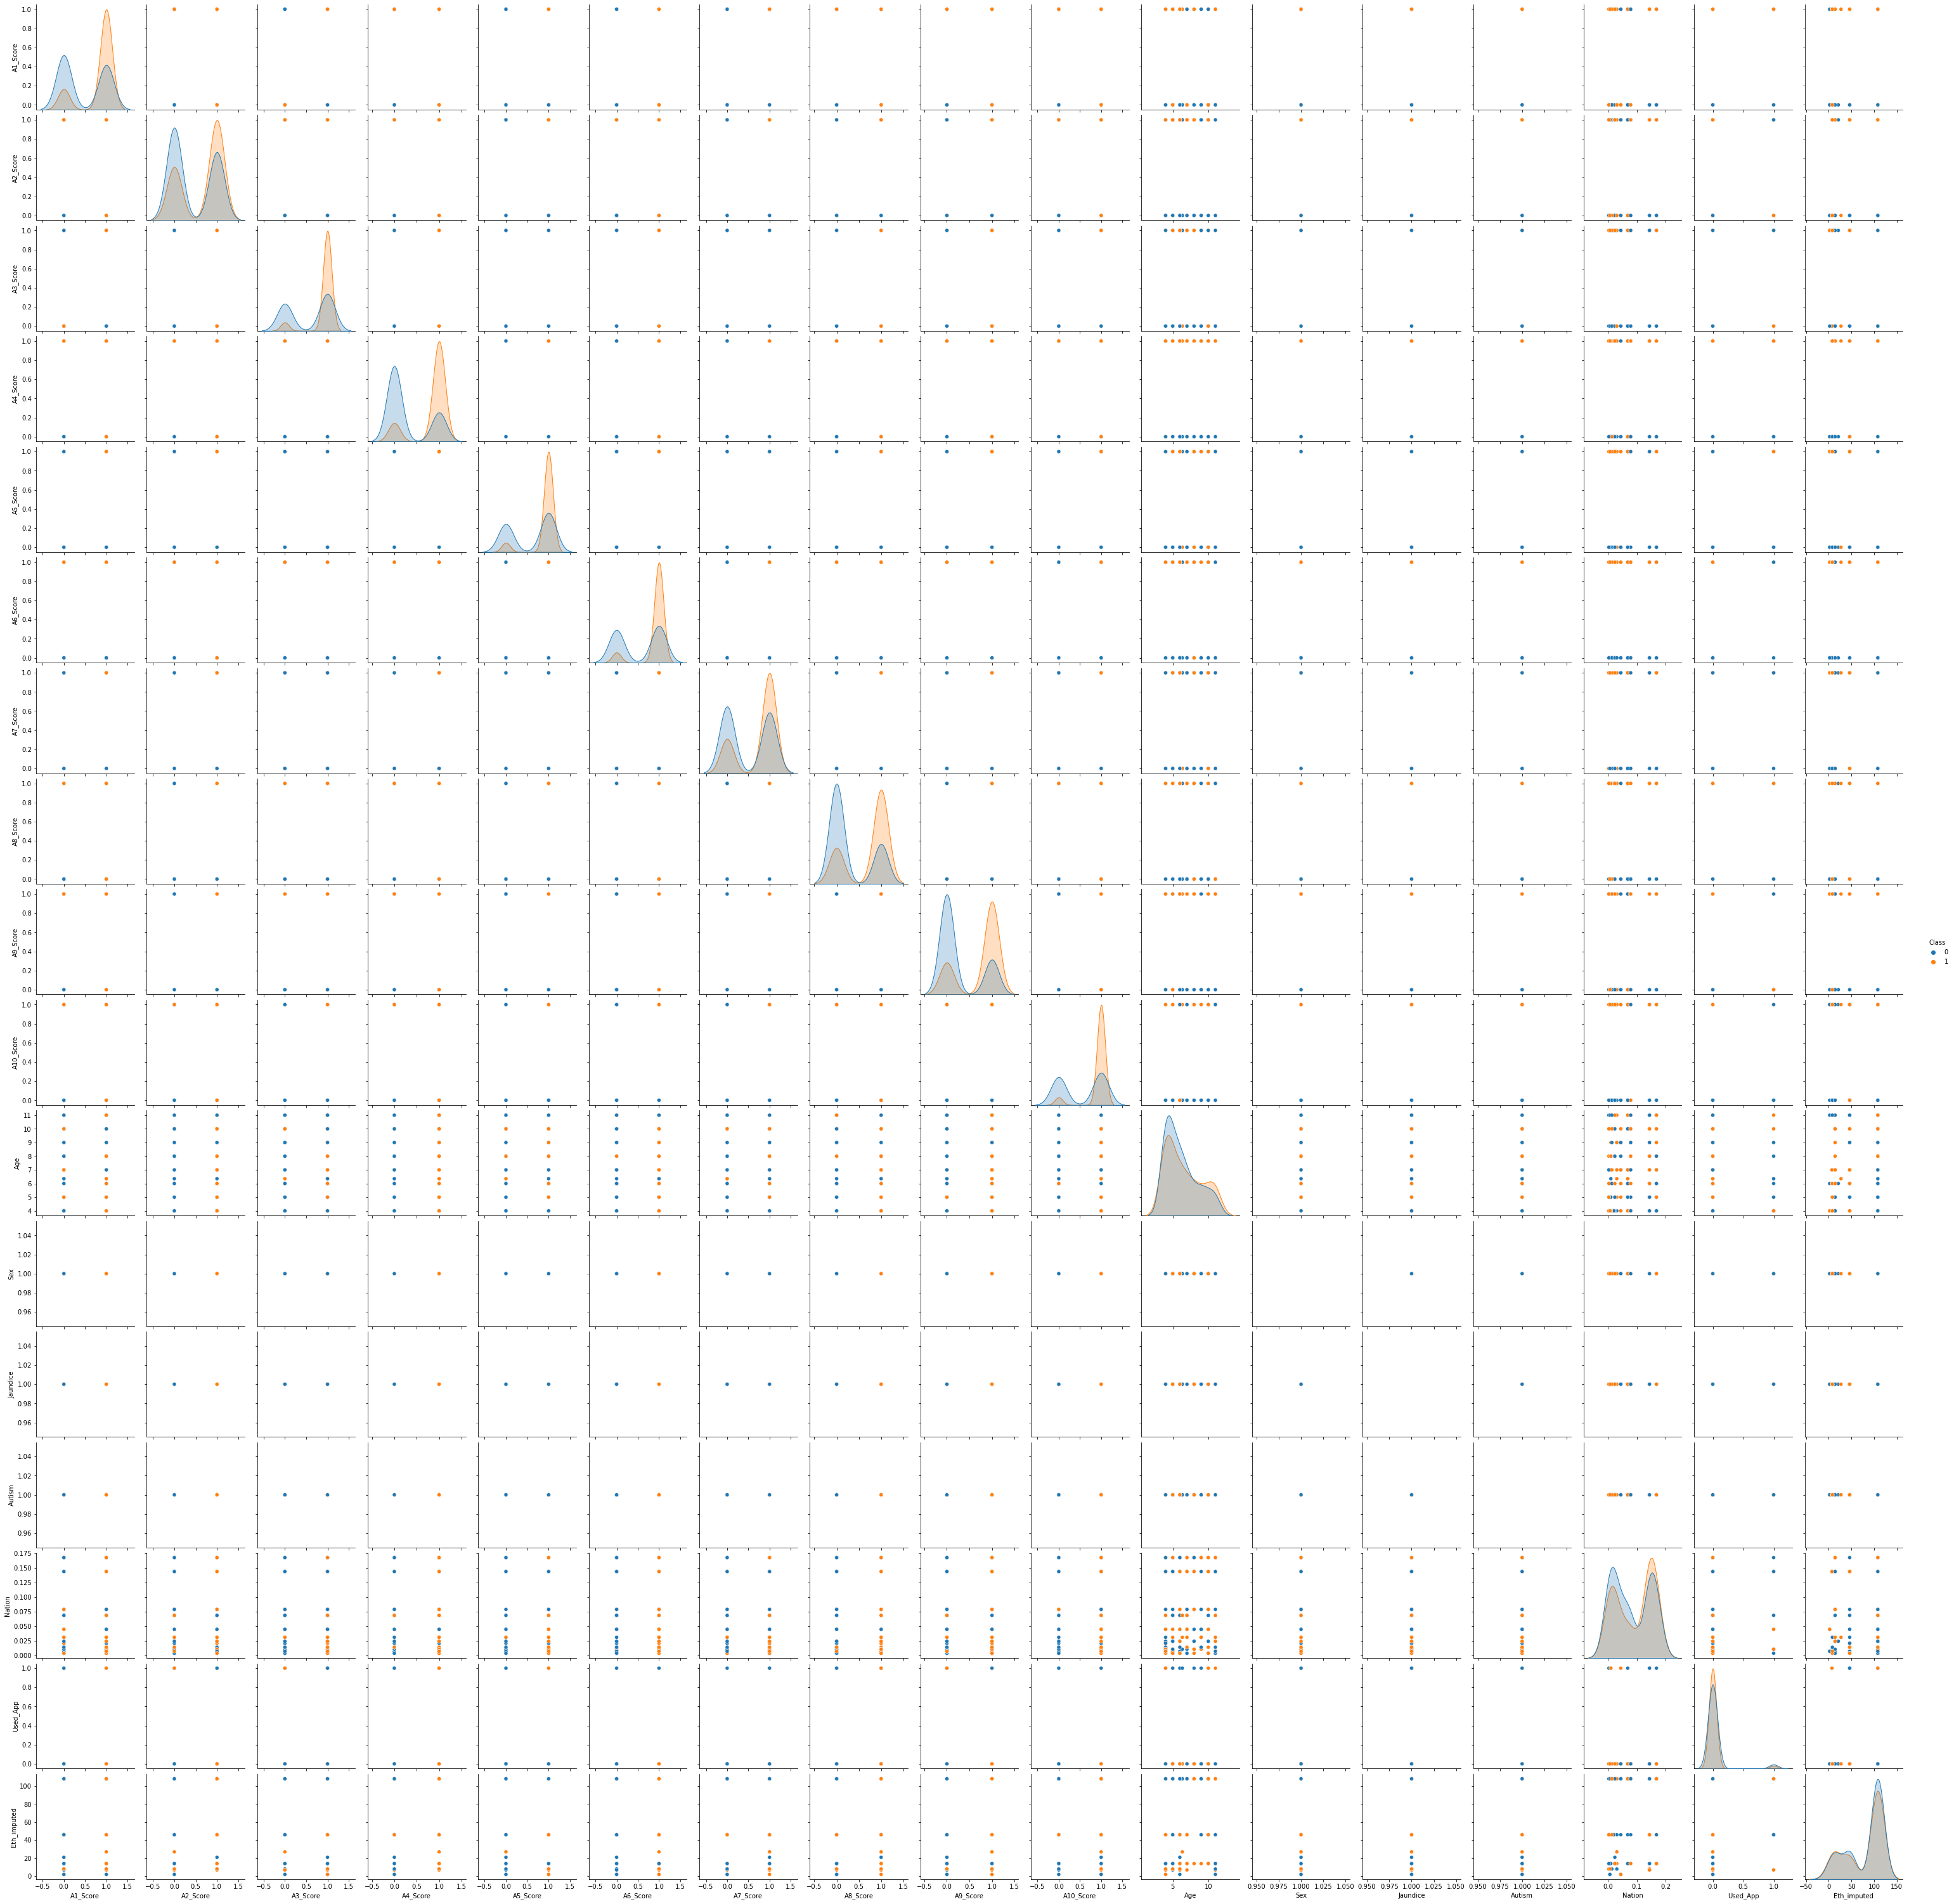

In [313]:
sns.pairplot(df1,hue ='Class')

In [314]:
from imblearn.combine import SMOTETomek 
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(x, y)

In [319]:
df2=pd.concat([X_res,y_res],axis=1)

In [320]:
df2

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Sex,Jaundice,Autism,Nation,Used_App,Eth_imputed,Class
0,1,1,0,0,1,1,0,1,0,0,6.000000,1,1,1,0.068493,0,14,0
1,1,1,0,0,1,1,0,1,0,0,6.000000,1,1,1,0.068493,0,108,0
2,1,1,0,0,0,1,1,1,0,0,6.000000,1,1,1,0.068493,1,46,0
3,0,1,0,0,1,1,0,0,0,1,5.000000,1,1,1,0.068493,0,108,0
4,1,1,1,1,1,1,1,1,1,1,5.000000,1,1,1,0.143836,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,1,1,0,1,0,1,1,1,1,4.000000,1,1,1,0.143836,0,108,1
284,1,0,0,0,1,1,1,1,1,1,10.000000,1,1,1,0.150500,0,108,1
285,1,0,1,0,1,1,0,1,0,1,6.061447,1,1,1,0.139206,0,108,1
286,1,0,1,1,1,1,0,0,1,1,4.000000,1,1,1,0.143729,0,7,1


In [326]:
from sklearn.metrics import accuracy_score
x,y = df2.loc[:,df2.columns != 'Class'].values,df2.loc[:,'Class'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 2)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Our model is",str(accuracy_score(y_test, y_pred)*100)+'%',"accurate")
kno =str(accuracy_score(y_test, y_pred)*100)+'%'

Our model is 87.93103448275862% accurate


In [330]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Train our classifier
model = gnb.fit(x_train,y_train)
# Make predictions
preds = gnb.predict(x_test)
print("Our model is",str(accuracy_score(y_test, preds)*100)+'%',"accurate")
gnn = str(accuracy_score(y_test, preds)*100)+'%'

Our model is 84.7457627118644% accurate


In [331]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Our model is",str(accuracy_score(y_test, y_pred)*100)+'%',"accurate")

Our model is 98.30508474576271% accurate


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [333]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)

0.9666289484158136

In [335]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9824561403508771

In [336]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.97      1.00      0.98        28

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59

